In [1]:
import pandas as pd
import yaml

from java_migration.utils import REPO_ROOT

DATA_PATH = REPO_ROOT / "data" / "cov_output_full"

In [2]:
repo_dirs = [x for x in DATA_PATH.iterdir() if x.is_dir()]

repo_cov = [yaml.safe_load(open(x / "cov.yaml")) for x in repo_dirs]

len(repo_cov)

210

<Axes: >

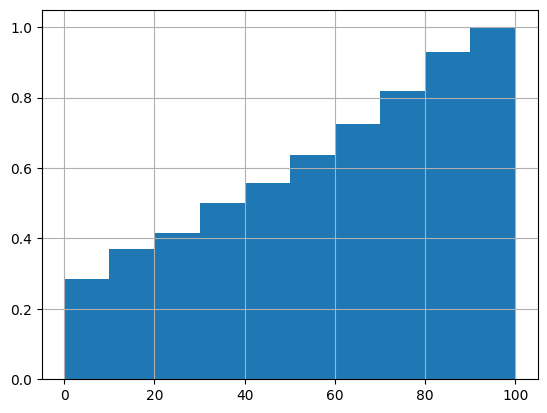

In [3]:
pd.DataFrame([x["LINE"] for x in repo_cov]).percent.hist(cumulative=True, density=True)

In [4]:
df = pd.DataFrame([x["LINE"] for x in repo_cov])

In [5]:
print(len(df[df.percent > 50]))
print(len(df[df.percent > 50]) / len(df))

93
0.44285714285714284


In [6]:
450 * 20 / 122

73.77049180327869

In [7]:
from java_migration.eval.utils import Dataset

with open(Dataset.get_path(Dataset.FULL)) as fin:
    ddict = yaml.safe_load(fin.read())

In [12]:
print(f"dataset size: {len(ddict)}")
print(f"repos with tests: {len([x for x in ddict if 'test_count' in x and x['test_count']['tests_run'] > 0])}")
print(f"repos with coverage: {len(df)}")
print(f"repos with 25% coverage: {len(df[df.percent > 25])}")
print(f"repos with 50% coverage: {len(df[df.percent > 50])}")

dataset size: 473
repos with tests: 265
repos with coverage: 210
repos with 25% coverage: 125
repos with 50% coverage: 93


In [10]:
210 / 265

0.7924528301886793